# Imports

In [1]:
import sys
sys.path.insert(0,'/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/')

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
from scipy.ndimage import gaussian_filter

from minot.ClusterTools import map_tools
import pitszi

# Get some data

In [2]:
hdul = fits.open('/Users/adam/Project/NIKA/Plots/LPSZ/PSZ2G144/15/iter0/map.fits')
img  = hdul[4].data / (-12.0)
head = hdul[4].header
hdul.info()

Filename: /Users/adam/Project/NIKA/Plots/LPSZ/PSZ2G144/15/iter0/map.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  Brightness_1mm    1 ImageHDU        35   (333, 333)   float64   
  2  Stddev_1mm    1 ImageHDU        35   (333, 333)   float64   
  3  Nhits_1mm     1 ImageHDU        35   (333, 333)   float64   
  4  Brightness_2mm    1 ImageHDU        36   (333, 333)   float64   
  5  Stddev_2mm    1 ImageHDU        36   (333, 333)   float64   
  6  Nhits_2mm     1 ImageHDU        36   (333, 333)   float64   
  7  Brightness_1    1 ImageHDU        37   (333, 333)   float64   
  8  Stddev_1      1 ImageHDU        37   (333, 333)   float64   
  9  Nhits_1       1 ImageHDU        37   (333, 333)   float64   
 10  Brightness_2    1 ImageHDU        38   (333, 333)   float64   
 11  Stddev_2      1 ImageHDU        38   (333, 333)   float64   
 12  Nhits_2       1 ImageHDU        38   (333, 333)   float64   
 13  Brigh

In [3]:
hdul = fits.open('/Users/adam/Project/NIKA/Plots/LPSZ/PSZ2G144/15/iter0/map_JK.fits')
jackknife  = hdul[4].data / (-12.0)

In [4]:
hdul = fits.open('/Users/adam/Project/NIKA/Plots/LPSZ/PSZ2G144/15/transfer_function.fits')
tf = hdul[1].data

# Load a model

In [5]:
model = pitszi.Model(redshift=0.5, M500=1.5e15*u.Msun, RA=head['CRVAL1']*u.deg, Dec=head['CRVAL2']*u.deg, silent=True)
model.map_reso = 2*u.arcsec
model.map_fov = 8*u.arcmin
model.los_reso = 12*u.kpc
model.los_size = 3*u.Mpc

# Define the data object

In [6]:
data = pitszi.Data(img, head, 
                   jackknife=jackknife)#, transfer_function={'k':tf['k']*u.arcsec**-1, 'TF':tf['tf_2mm']})
data.set_nika2_reference_tf()

(0.0, 0.05)

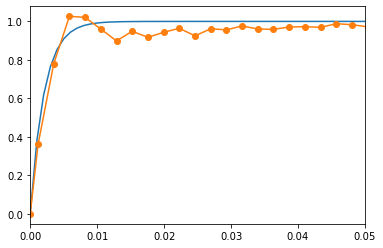

In [8]:
plt.plot(data.transfer_function['k'], data.transfer_function['TF'])
plt.plot(tf['k'], tf['tf_2mm'], marker='o')
plt.xlim(0, 0.05)

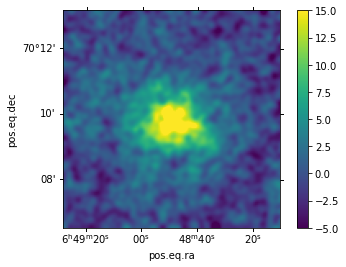

In [28]:
ax = plt.subplot(1, 1, 1, projection=WCS(data.header))
plt.imshow(gaussian_filter(data.image[100:-100, 100:-100], sigma=5/data.header['CDELT2']/3600)*1e5, vmin=-5, vmax=15)
plt.colorbar()

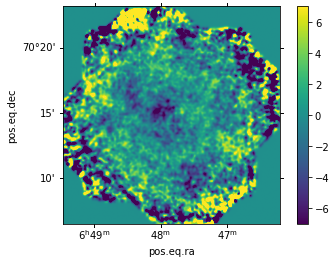

In [37]:
ax = plt.subplot(1, 1, 1, projection=WCS(data.header))
plt.imshow(gaussian_filter(data.noise_jackknife, sigma=5/data.header['CDELT2']/3600)*1e5, vmin=-7, vmax=7)
plt.colorbar()

In [31]:
mock_data = data.set_image_to_mock(model, model_no_fluctuations=True, use_model_header=False, noise_origin='model')

/Users/adam/Project/NIKA/Software/Processing/Labtools/RA/pitszi/pitszi/data_main.py:95: RuntimeWarning: divide by zero encountered in reciprocal
  self.noise_model_pk_center = lambda k_arcsec: 5e-9 + 15e-9 * (k_arcsec*60)**-1 # output in [y] x arcsec^2


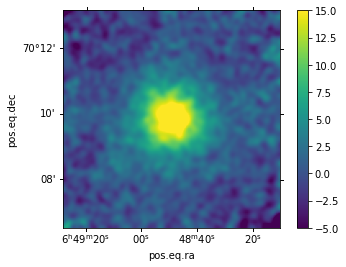

In [32]:
ax = plt.subplot(1, 1, 1, projection=WCS(data.header))
plt.imshow(gaussian_filter(data.image[100:-100, 100:-100], sigma=5/data.header['CDELT2']/3600)*1e5, vmin=-5, vmax=15)
plt.colorbar()